In [6]:
import pandas as pd
d=pd.read_csv('/content/breast_cancer_survival (1).csv')
d.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [10]:
d['Gender']=d['Gender'].replace({'MALE':1,'FEMALE':0})
d['ER status']=d['ER status'].replace({'Positive':1,'Negative':0})
d['PR status']=d['PR status'].replace({'Positive':1,'Negative':0})
d['HER2 status']=d['HER2 status'].replace({'Positive':1,'Negative':0})
d['Tumour_Stage']=d['Tumour_Stage'].replace({'I':1,'II':2,'III':3,'IV':4})
d['Histology']=d['Histology'].replace({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':0,'Mucinous Carcinoma':0.5})
d['Surgery_type']=d['Surgery_type'].replace({'Simple Mastectomy':1,'Lumpectomy':0,'Modified Radical Mastectomy':2,'Other':3})
d['Patient_Status']=d['Patient_Status'].replace({'Alive':1,'Dead':0})
d.head()
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0          1.0          1          1        

In [19]:
y=d['Patient_Status']
d.dropna()
print(y)

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
329    1.0
330    1.0
331    0.0
332    1.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64


In [9]:
x=d.drop(['Patient_Status','Date_of_Last_Visit','Date_of_Surgery'],axis=1)
x.dropna()
print(x)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  
0          1.0          1          1         

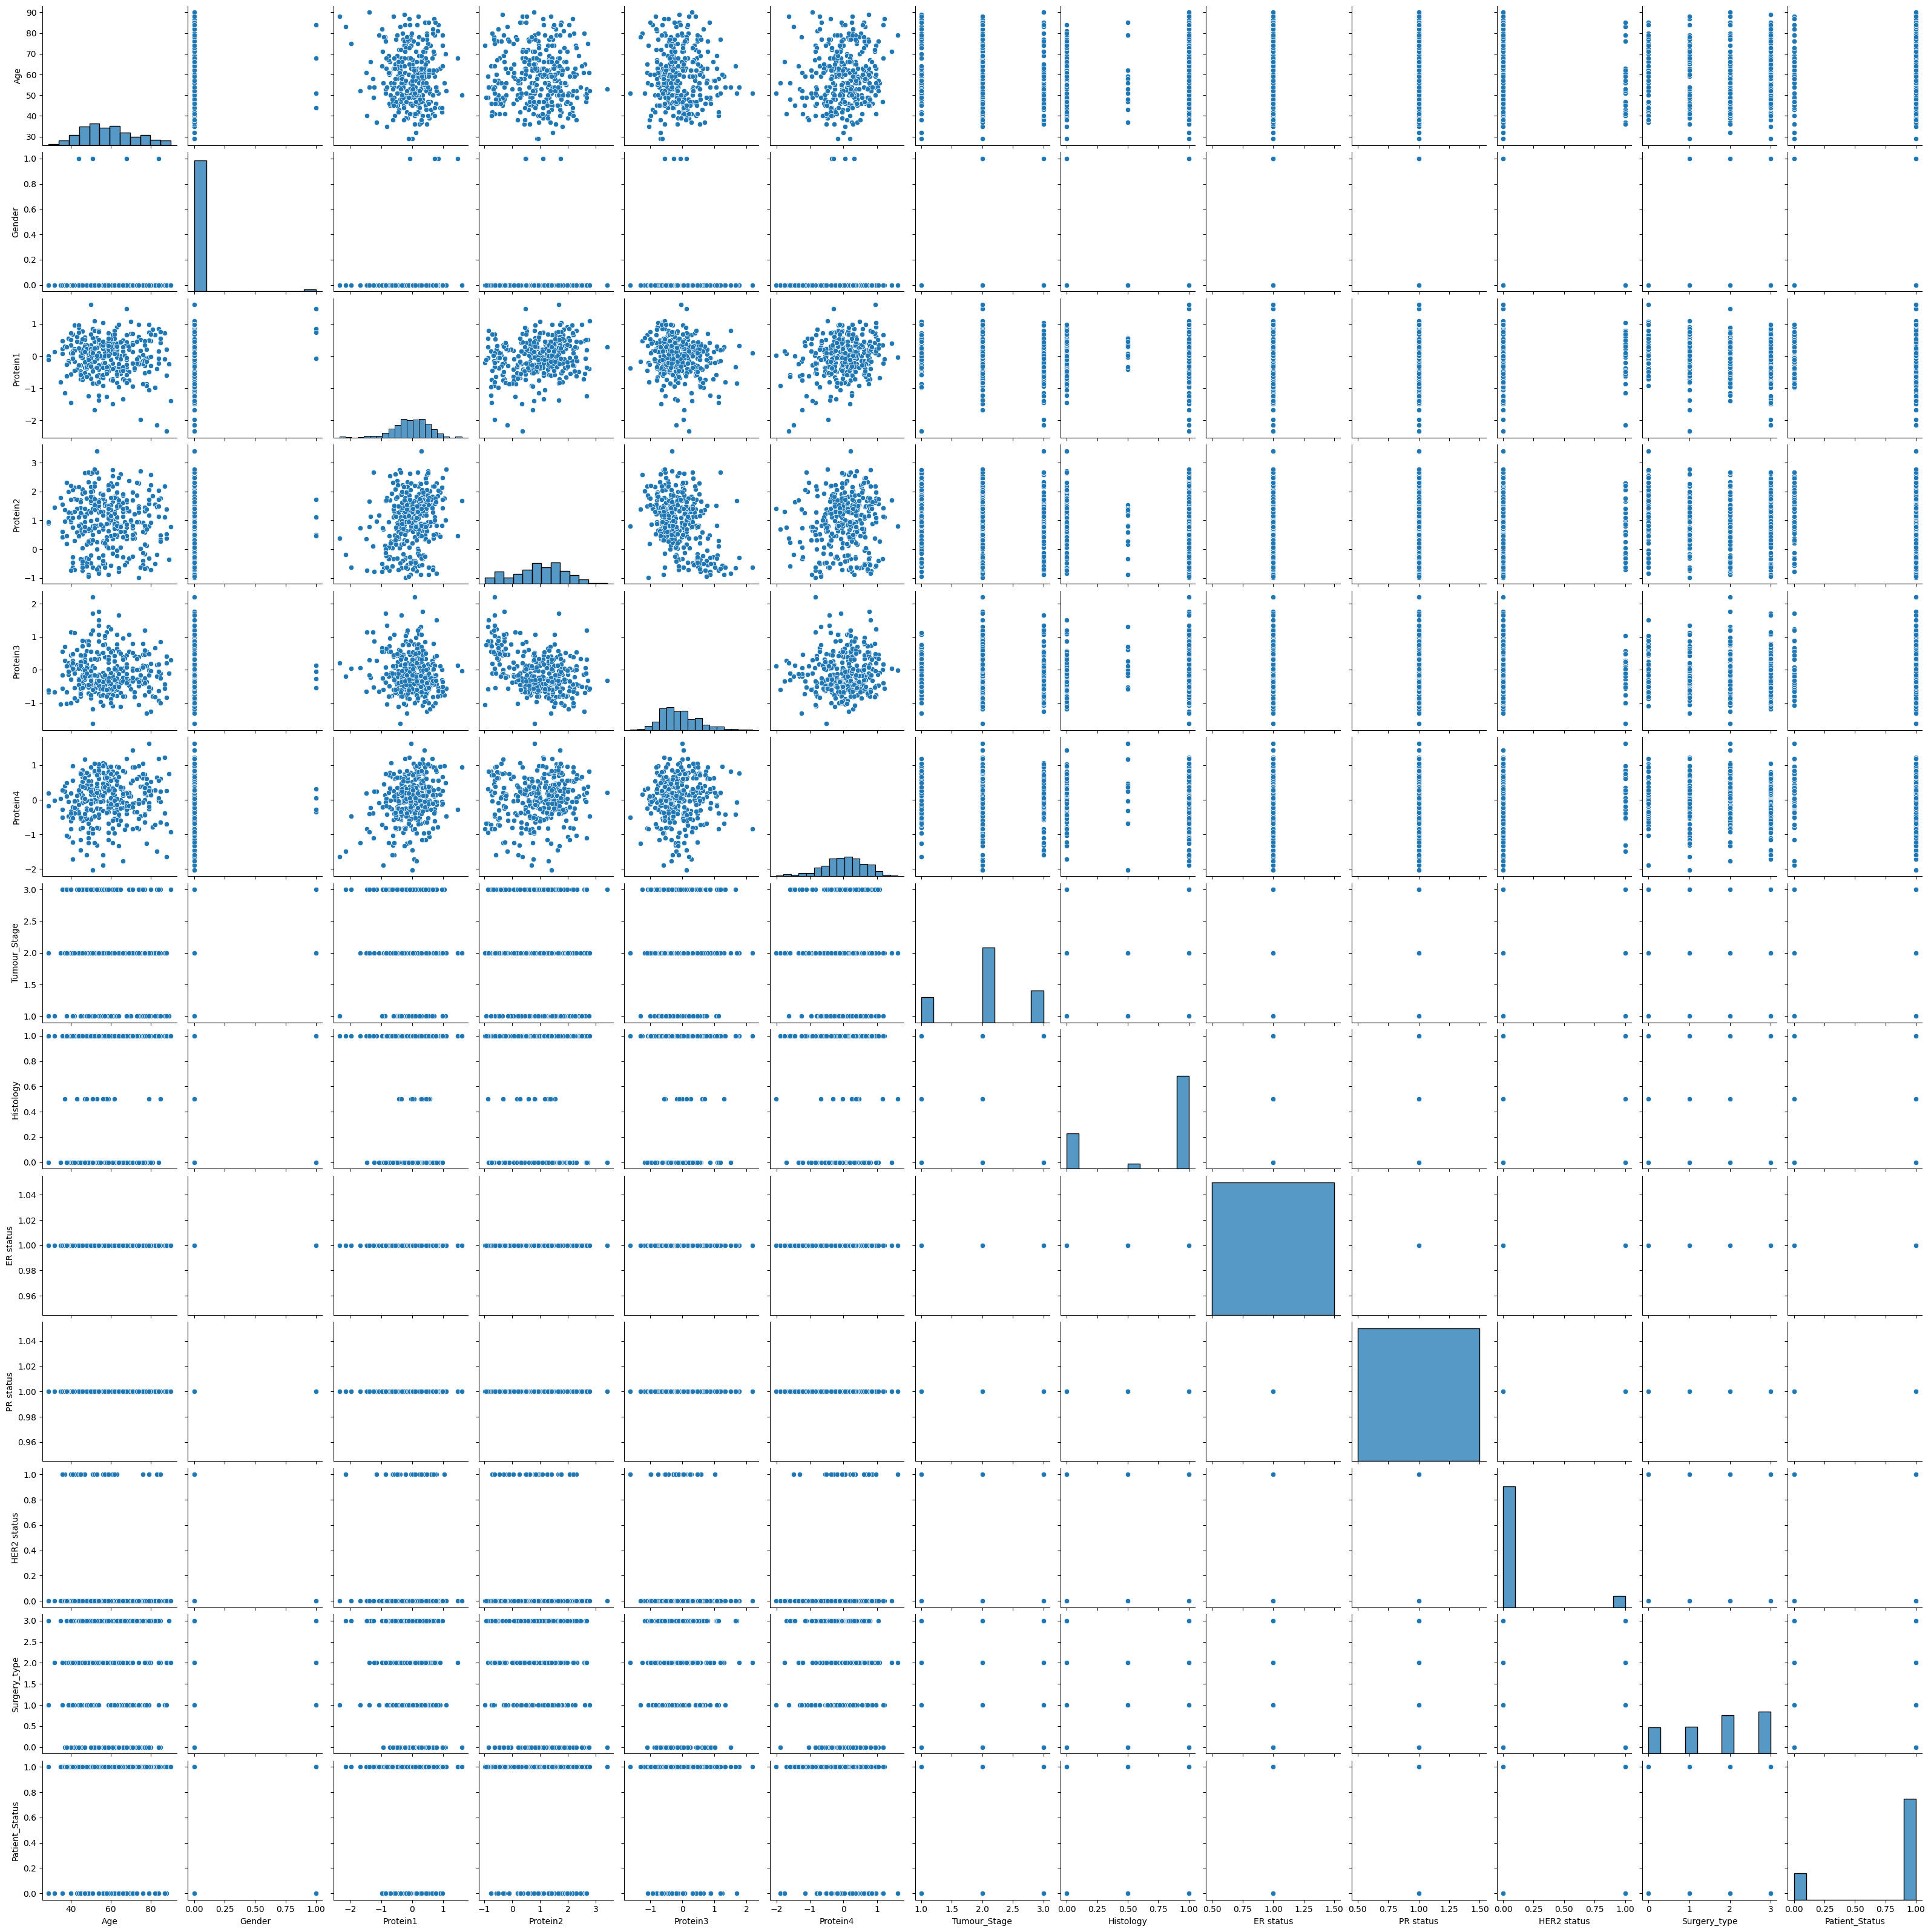

In [13]:
sns.pairplot(d)


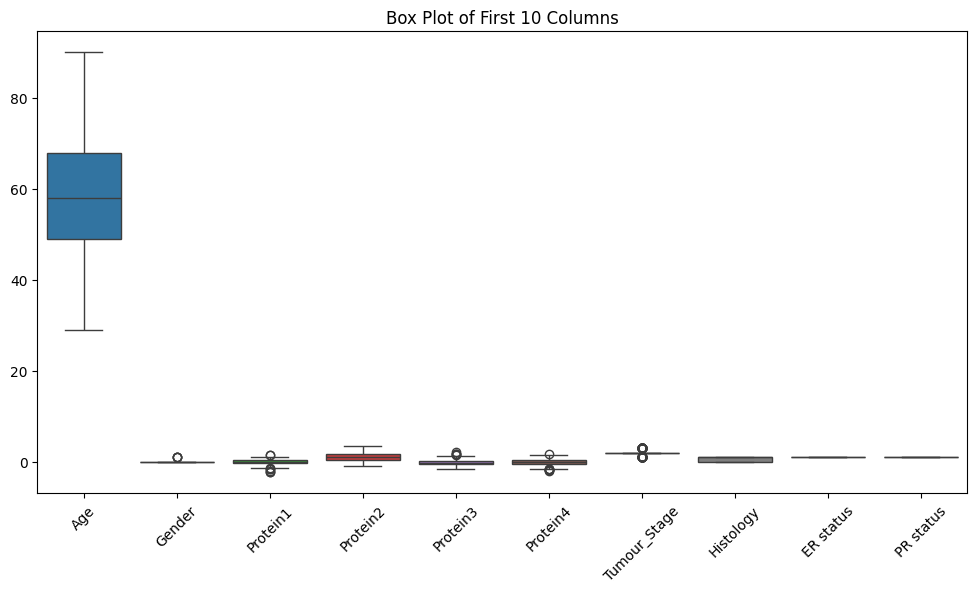

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

first_10_columns = d.columns[:10]

plt.figure(figsize=(12, 6))
sns.boxplot(data=d[first_10_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of First 10 Columns')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

x=d.drop(['Patient_Status','Date_of_Last_Visit','Date_of_Surgery'],axis=1)
y = d['Patient_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


imputer = SimpleImputer(strategy='most_frequent')


d['Patient_Status'] = imputer.fit_transform(d[['Patient_Status']])


x = d.drop(['Patient_Status', 'Date_of_Last_Visit', 'Date_of_Surgery'], axis=1)
y = d['Patient_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)





In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)


SVC(kernel='linear')

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print()
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        12
         1.0       0.82      1.00      0.90        55

    accuracy                           0.82        67
   macro avg       0.41      0.50      0.45        67
weighted avg       0.67      0.82      0.74        67



Confusion Matrix:
 [[ 0 12]
 [ 0 55]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)


grid.fit(x_train, y_train)

print("Best parameters found: ", grid.best_params_)

y_pred = grid.predict(x_test)


print("Classification Report:\n", classification_report(y_test, y_pred))
print()
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
